In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df = pd.read_excel("/content/drive/MyDrive/Dry_Bean_Dataset.xlsx")

Mounted at /content/drive


In [3]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [4]:
data= pd.DataFrame(df, columns = df.columns)

In [5]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [6]:
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

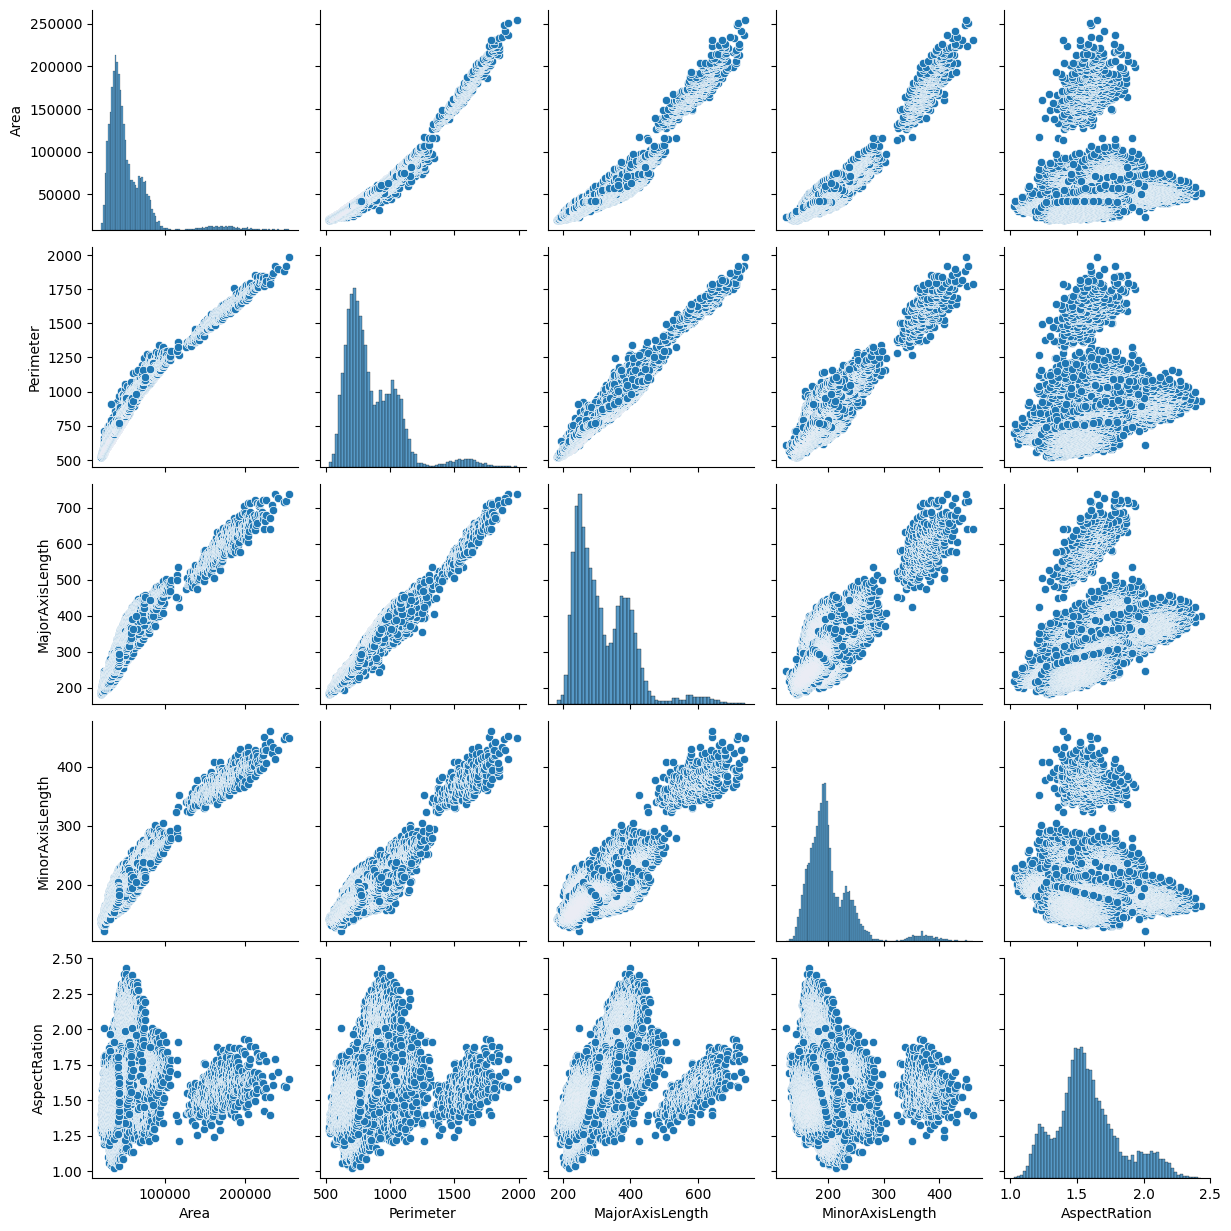

In [8]:
import seaborn as sns

sns.pairplot(data,
             vars=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength','AspectRation'])
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
  data[i]=le.fit_transform(data[i])
     

In [10]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,788,543,114,3086,580,580,787,788,7199,7840,12793,12966,10377,13467,12966,12263,5
1,848,1113,41,4592,33,33,874,848,9738,2912,7086,13508,8840,13540,13508,11550,5
2,982,791,181,3397,697,697,986,982,8934,9263,12304,12857,10047,13401,12857,12999,5
3,1129,1322,140,4545,212,212,1242,1129,9566,464,8788,13291,9036,13494,13291,3831,5
4,1169,724,50,6235,7,7,1163,1169,8287,11582,13533,13536,7152,13542,13536,13168,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,4994,5533,6279,5257,6844,6844,5008,4994,3058,10690,10105,6809,8156,7132,6809,11426,3
13607,4995,5455,5810,6328,4516,4516,5000,4995,11801,11387,10634,9116,7087,8145,9116,11012,3
13608,5004,5517,5806,6458,4381,4381,5035,5004,4211,9920,10301,9165,7041,8164,9165,7525,3
13609,5010,5685,5928,6233,4928,4928,5060,5010,2372,5950,9192,8563,7298,7906,8563,4947,3


In [11]:
#Splitting the data into training and test test
X = data.iloc[:,0:15].values
y = data.iloc[:,16].values
#추출

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
     


In [12]:
y_train

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
X_train

array([[ 8794,  9442,  8595, ...,  2363,  5846,  9246],
       [ 5301,  7292,  8264, ..., 11332,  3839,  1423],
       [ 5542,  6263,  6377, ...,  6530,  7508,  8279],
       ...,
       [ 7363,  7923,  7823, ...,  4160,  6194,  7393],
       [  681,   925,  1918, ..., 13199,  9194,  5281],
       [ 9779, 11153, 10284, ...,  1899,  4259,  5606]])

In [14]:
X

array([[  788,   543,   114, ..., 10377, 13467, 12966],
       [  848,  1113,    41, ...,  8840, 13540, 13508],
       [  982,   791,   181, ..., 10047, 13401, 12857],
       ...,
       [ 5004,  5517,  5806, ...,  7041,  8164,  9165],
       [ 5010,  5685,  5928, ...,  7298,  7906,  8563],
       [ 5013,  5974,  6691, ...,  8953,  6355,  5069]])

In [15]:
y

array([5, 5, 5, ..., 3, 3, 3])

In [26]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(500,input_shape=(15,),activation='ReLU'))
model.add(Dense(300,activation='ReLU'))
model.add(Dense(100,activation='ReLU'))
model.add(Dense(7,activation='sigmoid'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 500)               8000      
                                                                 
 dense_17 (Dense)            (None, 300)               150300    
                                                                 
 dense_18 (Dense)            (None, 100)               30100     
                                                                 
 dense_19 (Dense)            (None, 7)                 707       
                                                                 
Total params: 189,107
Trainable params: 189,107
Non-trainable params: 0
_________________________________________________________________


In [27]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
341/341 [==============================] - 3s 7ms/step - loss: 400.9332 - accuracy: 0.2472 - val_loss: 1.8397 - val_accuracy: 0.2696
Epoch 2/100
341/341 [==============================] - 3s 9ms/step - loss: 1.8418 - accuracy: 0.2582 - val_loss: 1.8458 - val_accuracy: 0.2696
Epoch 3/100
341/341 [==============================] - 3s 9ms/step - loss: 1.8428 - accuracy: 0.2558 - val_loss: 1.8451 - val_accuracy: 0.2696
Epoch 4/100
341/341 [==============================] - 3s 9ms/step - loss: 1.8425 - accuracy: 0.2569 - val_loss: 1.8393 - val_accuracy: 0.2696
Epoch 5/100
341/341 [==============================] - 2s 6ms/step - loss: 1.8445 - accuracy: 0.2506 - val_loss: 1.8427 - val_accuracy: 0.2696
Epoch 6/100
341/341 [==============================] - 2s 5ms/step - loss: 1.8430 - accuracy: 0.2582 - val_loss: 1.8418 - val_accuracy: 0.2696
Epoch 7/100
341/341 [==============================] - 2s 6ms/step - loss: 1.8427 - accuracy: 0.2530 - val_loss: 1.8446 - val_accuracy: 0.26

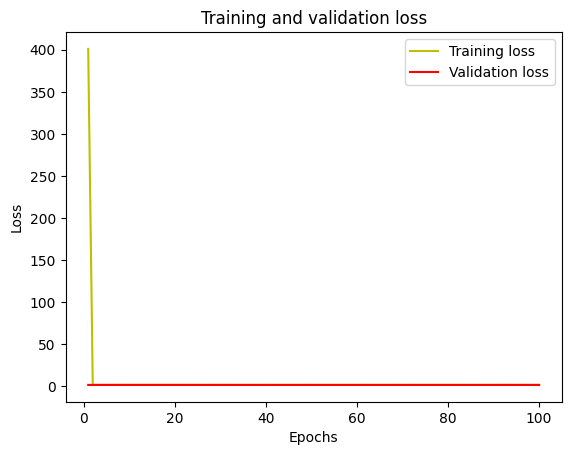

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

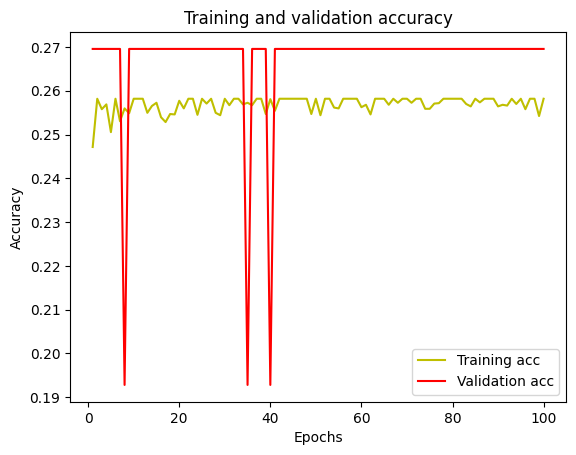

In [29]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       255
           1       0.00      0.00      0.00        92
           2       0.00      0.00      0.00       350
           3       0.27      1.00      0.42       735
           4       0.00      0.00      0.00       390
           5       0.00      0.00      0.00       376
           6       0.00      0.00      0.00       525

    accuracy                           0.27      2723
   macro avg       0.04      0.14      0.06      2723
weighted avg       0.07      0.27      0.11      2723

[[  0   0   0 255   0   0   0]
 [  0   0   0  92   0   0   0]
 [  0   0   0 350   0   0   0]
 [  1   0   0 734   0   0   0]
 [  0   0   0 390   0   0   0]
 [  0   0   0 376   0   0   0]
 [  0   0   0 525   0   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
